# KNN for Regression

In [20]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [21]:
#import mglearn 

In [22]:
#mglearn.plots.plot_knn_regression(n_neighbors=1)

In [23]:
#mglearn.plots.plot_knn_regression(n_neighbors=3)

In [24]:
#np.save('y.npy', y)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
#X, y = mglearn.datasets.make_wave(n_samples=40)# split the wave dataset into a training and a test set
X = np.load('X.npy')
y = np.load('y.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [33]:
print(reg.score(X_test, y_test))

0.8344172446249605


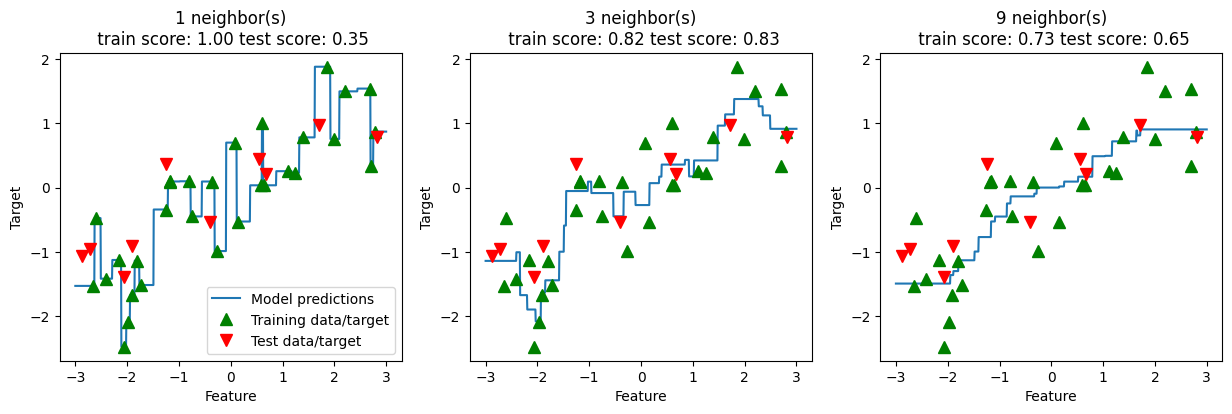

In [39]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c='green',   
             markersize=8)
    ax.plot(X_test, y_test, 'v', c='red', markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, 
              y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

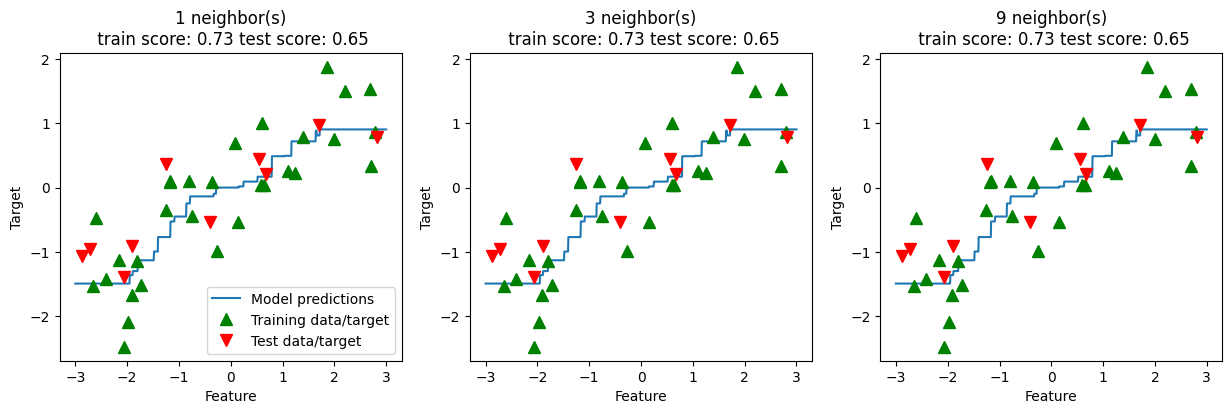

In [44]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    #reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c='green',   
             markersize=8)
    ax.plot(X_test, y_test, 'v', c='red', markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, 
              y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

Interesting parameters for KNR
<br>
1. weights : {'uniform', 'distance'}
2. metric : {'minkowski', 'euclidean', 'manhattan', 'chebyshev' ...}
3. p : int (minkowski distance power, default = 2)

For more information visit
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [46]:
def minkowski_distance(x_test, x_train, p):
    return sum(abs(e1-e2)**p for e1, e2 in zip(x_test,x_train))**(1/p)

In [47]:

def predict(X_train, y_train,  X_test, k):
        p = 2
        m = X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []

        # Calculating distances  
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                d = minkowski_distance(X_test, X_train, p)  # Minkovski distance
                distance.append((d, y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order

            # Getting k nearest neighbors
            neighbors = []
            for item in range(k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            y_pred.append(np.mean(neighbors))  # For Regression
            #y_pred.append(stats.mode(neighbors)[0][0])  # For Classification    
            
        return y_pred

In [ ]:
predict(X_train, y_train,  X_test=line, k=3)

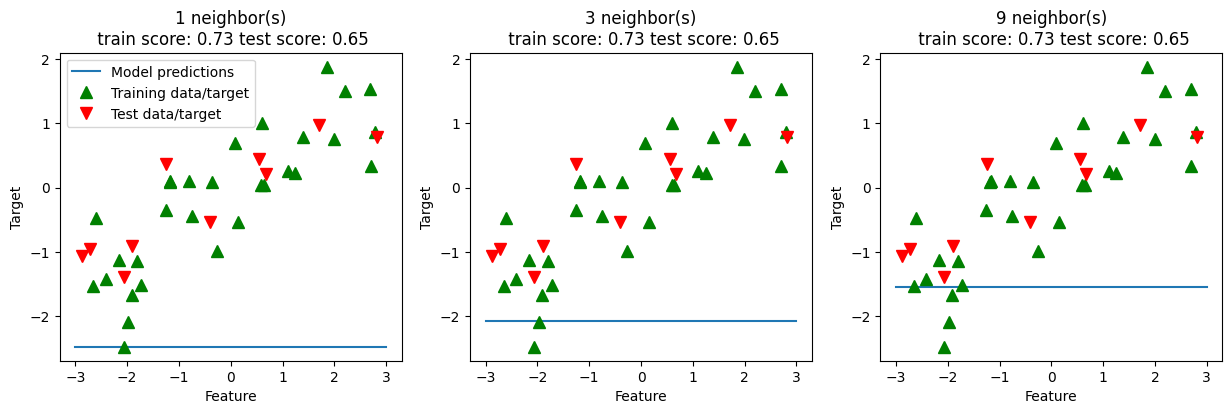

In [51]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    pred = predict(X_train, y_train,  X_test=line, k=n_neighbors)
    # make predictions using 1, 3, or 9 neighbors
    #reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    #reg.fit(X_train, y_train)
    #ax.plot(line, reg.predict(line))
    ax.plot(line, pred)
    ax.plot(X_train, y_train, '^', c='green',   
             markersize=8)
    ax.plot(X_test, y_test, 'v', c='red', markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, 
              y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

# Try to implement yourself

Hints and subtasks
1. You can use the same dataset (X, y)
2. You will need distance function
3. You will need to find K closest points to the given one. You may start with the simple implementation of this algorithm.
3. In the same graphic draw train and test scores when changing K parameter (First try to imagine how should this look?).